In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

data = pd.read_csv('train\\simple\\simple.csv')[['Pic', 'NumCircles']]
img_list = []
for i in range(1000):
    temp = cv2.imread("train\\simple\\" + '{:05}'.format(i) + '.png')
    img_list.append(cv2.resize(temp,(480, 480)))
    

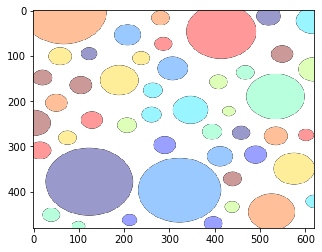

In [87]:
plt.imshow(img_list[1])
plt.show()

cv2.imshow("Image", img_list[1])
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
data

,Pic,NumCircles
0,0,30
1,1,47
2,2,48
3,3,49
4,4,27
...,...,...
995,995,34
996,996,21
997,997,44
998,998,16


47


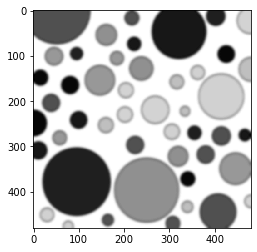

In [96]:
def len_circles(circles):
    if circles is None:
        return 0
    else:
        return len(circles[0])

def count_num(img, trs=250):
    k_size = 5    
    g_size = 15
    kernel = np.ones((k_size,k_size),np.uint8)
    img = cv2.GaussianBlur(img, (g_size,g_size),0)
    
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, img_threshold = cv2.threshold(img_grey, trs, 255, cv2.THRESH_BINARY)    
    
    # img_threshold = cv2.Laplacian(img_threshold,cv2.CV_8U) 
    #img_threshold = cv2.dilate(img_threshold,kernel,iterations = 1)
    #img_threshold = cv2.erode(img_threshold,kernel,iterations = 1)
    #img_threshold = cv2.GaussianBlur(img_threshold, (g_size,g_size),0)
    
    circles = cv2.HoughCircles(img_grey,cv2.HOUGH_GRADIENT, 1, 20, param1=45,param2=20,minRadius=6,maxRadius=85)
    #circles = cv2.HoughCircles(img_threshold,cv2.HOUGH_GRADIENT, 1, 20, param1=50,param2=30,minRadius=0,maxRadius=0)
    
    return img_grey, len_circles(circles), circles
    #return img_threshold, len_circles(circles), circles

g, n, circles = count_num(img_list[1])
#g = count_num(img_list[1])
print(n)
#print(circles)

cimg = img_list[1].copy()
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(int(i[0]),int(i[1])),2,(0,0,255),3)
cv2.imshow("Orig", img_list[1])
cv2.imshow("Find", cimg)
cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(g,cmap='gray')
plt.show()

In [97]:
n_pred_list = []
err_list = []
for i, img_i in enumerate(img_list):
    img_mod_i, n_pred_i, circles_i = count_num(img_i)
    n_pred_list.append(n_pred_i)
    n_true_i = data['NumCircles'][i]
    err_i = (float(n_true_i) - float(n_pred_i))/float(n_true_i)
    err_list.append(err_i)
    #print(n_true_i, n_pred_i, )
    
n_true = data['NumCircles'].to_numpy()
n_pred = np.array(n_pred_list)
err = np.array(err_list)

print(np.mean(err))
print('========')
print(n_pred - n_true)

0.008433348951284171
[ 0  0 -1  0  0 -1  0  0  0 -1 -2 -1  0  0  0  0 -1  0  0  0  0  0 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0 -1 -1  0  0  0 -1  0  0  0
  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -2  0
  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0 -1 -3  0 -1  0  0  0  0 -1  0  0  0  0  0
  0  0 -1  0  0  0  0  0 -2  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0
  0 -2  0 -1  0  0  0  0  1  0  0  0  0 -1  0  0  0  0  0  0  0  1  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0
  0  0  0  0  0 -2 -2 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0 -4  0  0 -1 -1  0 -1  0  0 -1  0 -2  0  0 -1  0  0  0
  0  0  0  0  0  0  0 -1 -1  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0
  0 -1 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0
  0 -2  0  0  0 -1  0  0 -1  0

In [98]:
# Эта их прекрасная метрика
contribs = (1 - np.abs(n_true-n_pred)/10.)
contribs[contribs < 0] = 0
contribs.sum()

967.5

In [100]:
# Теперь считаем sub
img_sub_list = []
for i in range(500):
    temp = cv2.imread("test\\simple\\" + '{:05}'.format(i) + '.png')
    img_sub_list.append(cv2.resize(temp,(480, 480)))
    
n_pred_sub_list = []
for i, img_i in enumerate(img_sub_list):
    img_mod_i, n_pred_i, circles_i = count_num(img_i)
    n_pred_sub_list.append(n_pred_i)
    
n_pred_sub = np.array(n_pred_sub_list)
n_pred_sub

out_df = pd.DataFrame({'id' : range(500), 'num' : n_pred_sub})
out_df.to_csv('simple.csv', index=False, header=False, sep=' ')